# 03 Principal Component Analysis Example with "wine" Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

print(df.iloc[:,0:4].head())


   alcohol  malic_acid   ash  alcalinity_of_ash
0    14.23        1.71  2.43               15.6
1    13.20        1.78  2.14               11.2
2    13.16        2.36  2.67               18.6
3    14.37        1.95  2.50               16.8
4    13.24        2.59  2.87               21.0


In [3]:
print(df.iloc[:,0:4].describe())


          alcohol  malic_acid         ash  alcalinity_of_ash
count  178.000000  178.000000  178.000000         178.000000
mean    13.000618    2.336348    2.366517          19.494944
std      0.811827    1.117146    0.274344           3.339564
min     11.030000    0.740000    1.360000          10.600000
25%     12.362500    1.602500    2.210000          17.200000
50%     13.050000    1.865000    2.360000          19.500000
75%     13.677500    3.082500    2.557500          21.500000
max     14.830000    5.800000    3.230000          30.000000


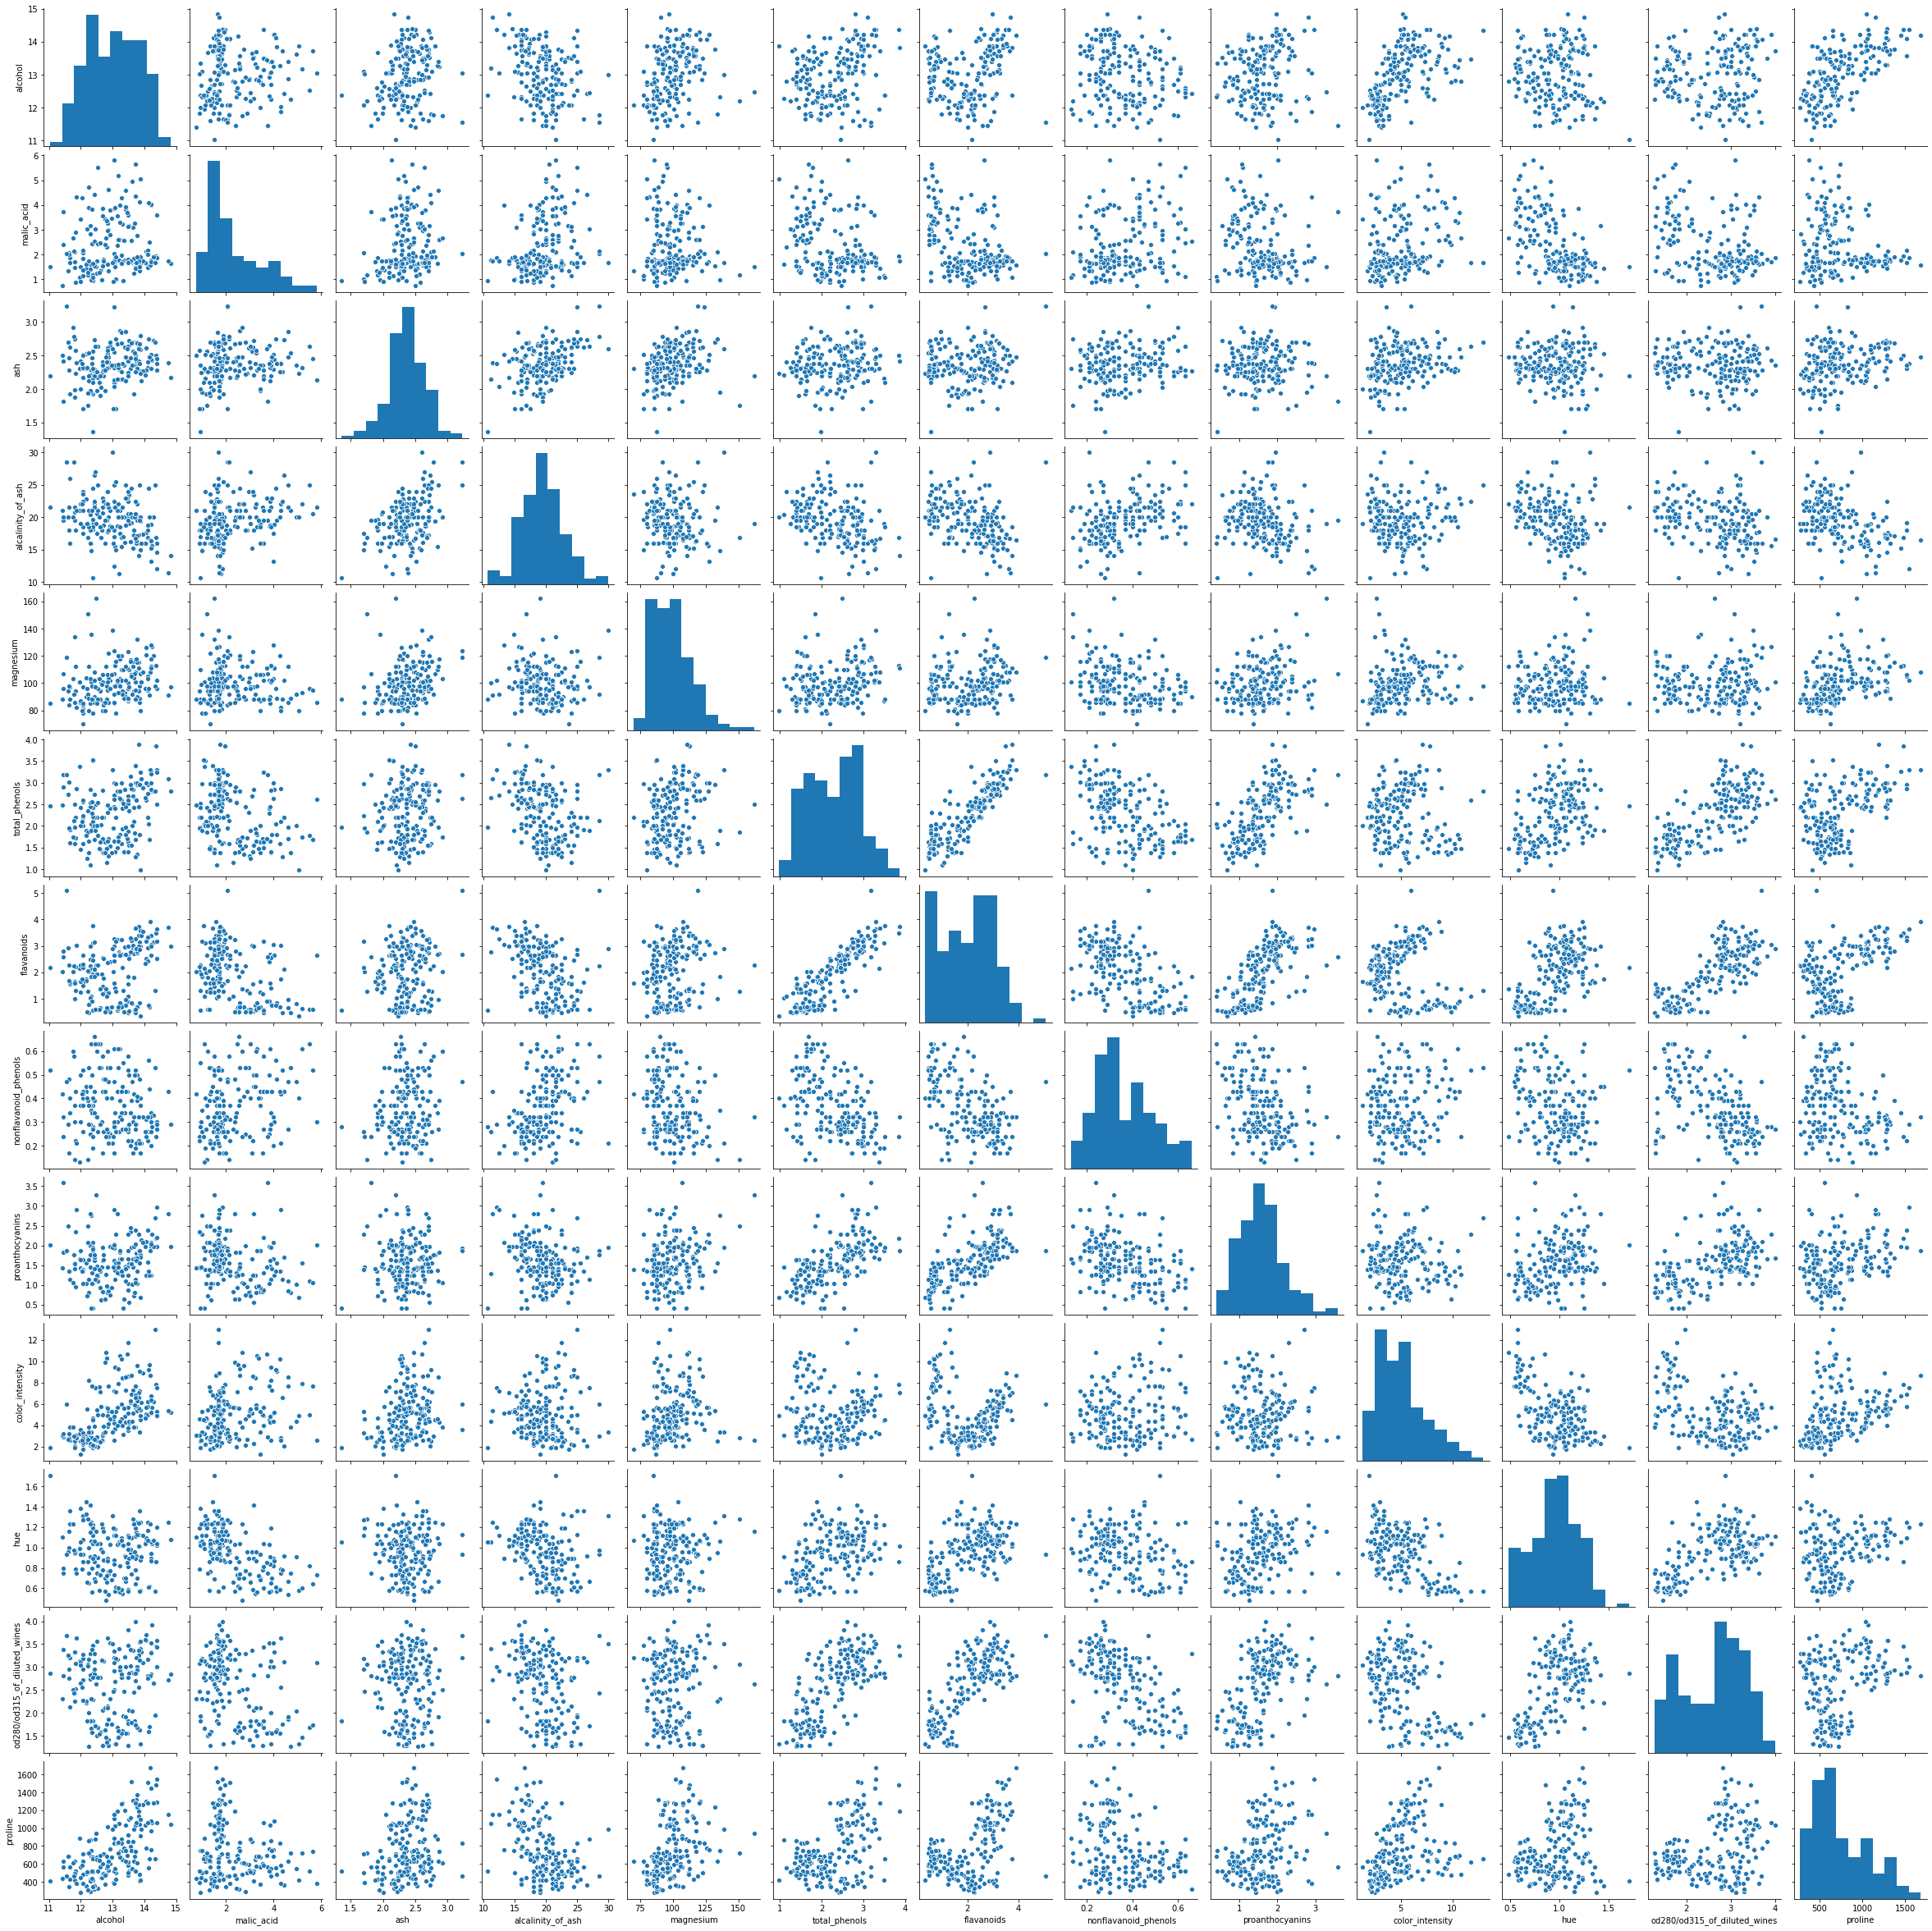

In [6]:
sns.pairplot(df)

In [7]:
df = StandardScaler().fit_transform(df)
df=pd.DataFrame(df,columns=wine.feature_names)


In [8]:
print(df.iloc[:,0:4].describe())


            alcohol    malic_acid           ash  alcalinity_of_ash
count  1.780000e+02  1.780000e+02  1.780000e+02       1.780000e+02
mean   7.841418e-15  2.444986e-16 -4.059175e-15      -7.110417e-17
std    1.002821e+00  1.002821e+00  1.002821e+00       1.002821e+00
min   -2.434235e+00 -1.432983e+00 -3.679162e+00      -2.671018e+00
25%   -7.882448e-01 -6.587486e-01 -5.721225e-01      -6.891372e-01
50%    6.099988e-02 -4.231120e-01 -2.382132e-02       1.518295e-03
75%    8.361286e-01  6.697929e-01  6.981085e-01       6.020883e-01
max    2.259772e+00  3.109192e+00  3.156325e+00       3.154511e+00


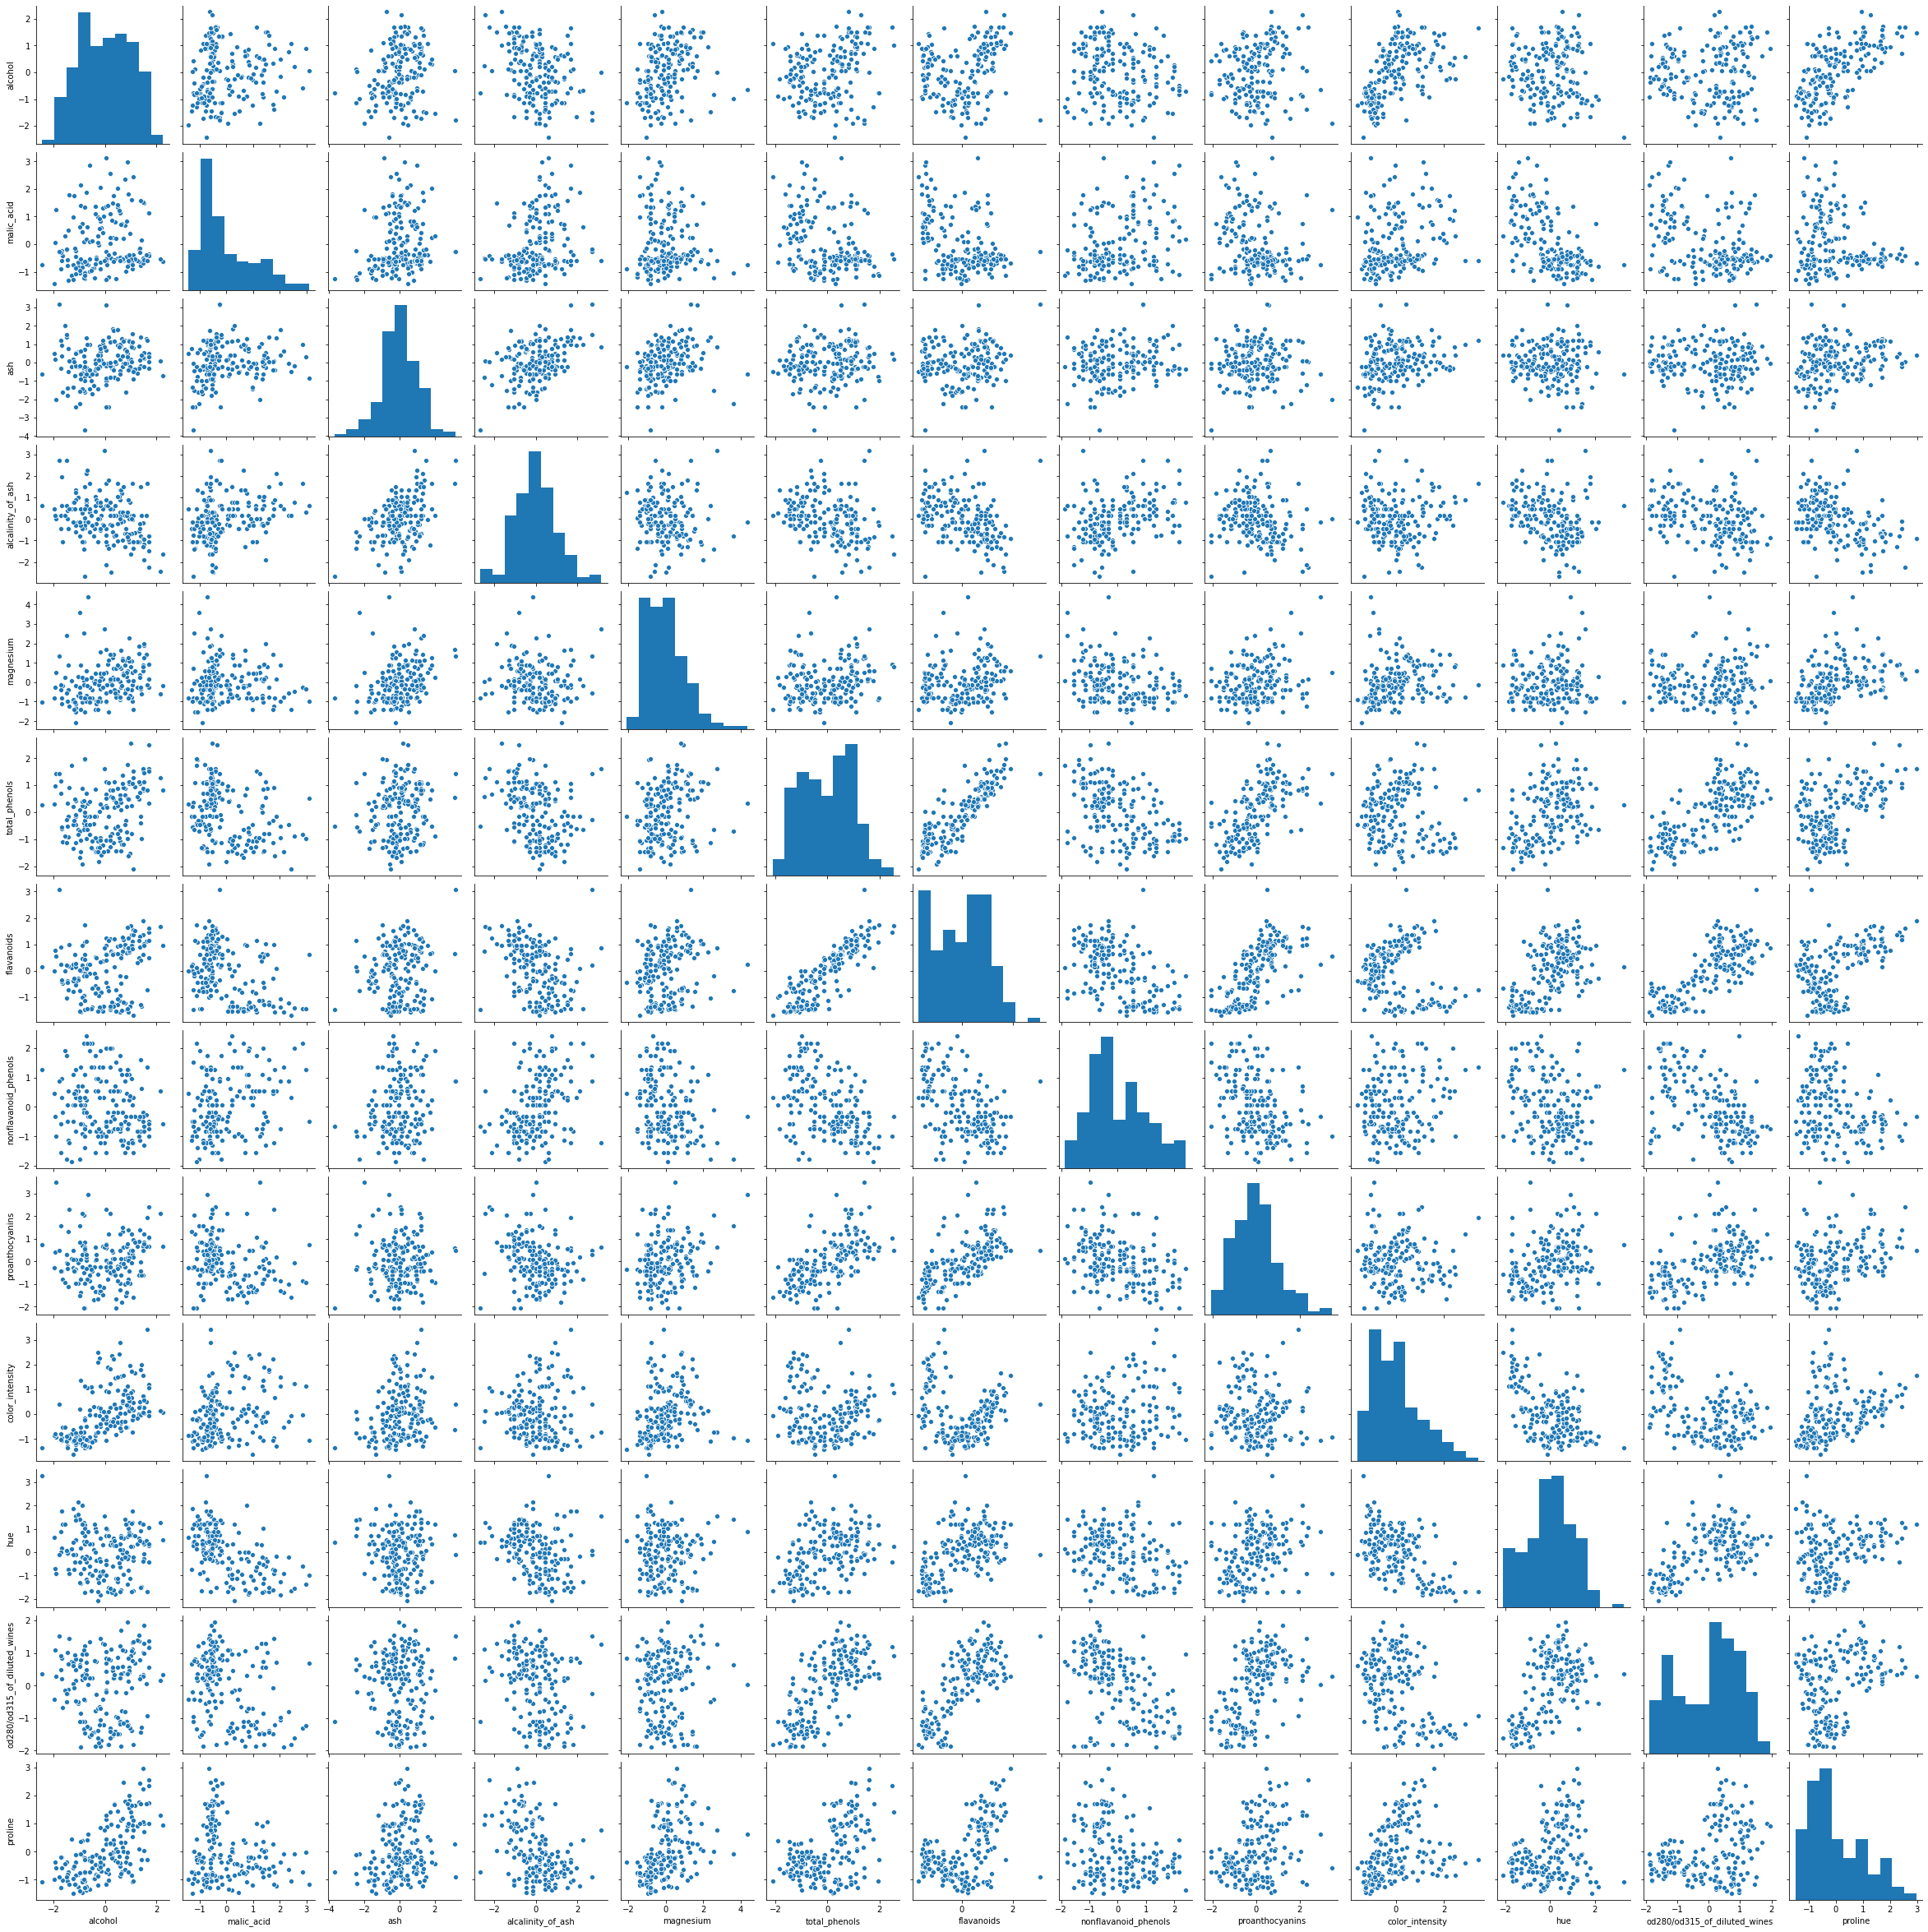

In [9]:
sns.pairplot(df)

In [10]:
pca = PCA(n_components=2)
pca_model=pca.fit(df)
df_trans=pd.DataFrame(pca_model.transform(df), columns=['pca1', 'pca2'])


In [11]:
print(df_trans.head())


       pca1      pca2
0  3.316751 -1.443463
1  2.209465  0.333393
2  2.516740 -1.031151
3  3.757066 -2.756372
4  1.008908 -0.869831


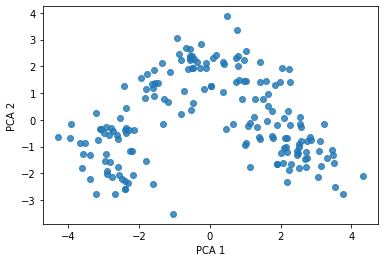

In [12]:
plt.scatter(df_trans['pca1'], df_trans['pca2'], alpha=0.8)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [13]:
comp=pd.DataFrame(pca_model.components_, columns=wine.feature_names)
print(comp)


    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.144329   -0.245188 -0.002051          -0.239320   0.141992   
1 -0.483652   -0.224931 -0.316069           0.010591  -0.299634   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.394661    0.422934             -0.298533         0.313429   
1      -0.065040    0.003360             -0.028779        -0.039302   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0        -0.088617  0.296715                      0.376167  0.286752  
1        -0.529996  0.279235                      0.164496 -0.364903  


In [14]:
print(pca_model.explained_variance_ratio_)


[0.36198848 0.1920749 ]


In [16]:
pca = PCA()
pca_model=pca.fit(df)


In [17]:
print(pca_model.explained_variance_ratio_)


[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


In [18]:
print(np.cumsum(pca_model.explained_variance_ratio_))


[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


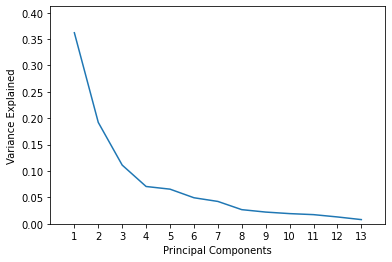

In [19]:
plt.plot(list(range(1,14)), pca.explained_variance_ratio_)
plt.axis([0, 14, 0, max(pca.explained_variance_ratio_)+0.05])
plt.xticks(list(range(1,14)))
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()


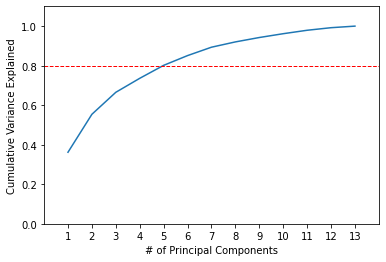

In [20]:
plt.plot(list(range(1,14)), np.cumsum(pca.explained_variance_ratio_))
plt.axis([0, 14, 0, 1.1])
plt.axhline(y=0.8, color='r', linestyle='--', linewidth=1)
plt.xticks(list(range(1,14)))
plt.xlabel('# of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()
